In [2]:
#KNN classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
filename='pima-indians-diabetes.data.csv'
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
dataframe=read_csv(filename,names=names)
array=dataframe.values
X=array[:,0:8]
Y=array[:,8]

In [5]:
kfold=KFold(n_splits=10)

In [6]:
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [7]:
model= KNeighborsClassifier(n_neighbors=11)
results=cross_val_score(model,X,Y, cv=kfold)

In [8]:
print(results.mean())

0.7408407382091592


# Grid Search Algorithm tunning

In [9]:
n_neighbors= np.array(range(1,40))
#param_grid =dict(n_neighbors=n_neighbors)

In [1]:
from sklearn.model_selection import ParameterGrid
param_grid ={"n_neighbors": np.array(range(1,14))}

NameError: name 'np' is not defined

In [11]:
model= KNeighborsClassifier()
grid1 = GridSearchCV(estimator=model, param_grid=param_grid)
grid1.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])})

In [30]:
print(grid1.best_score_)
print(grid1.best_params_)



0.7552584670231729
{'n_neighbors': 13}


# Visualizing the CV Results

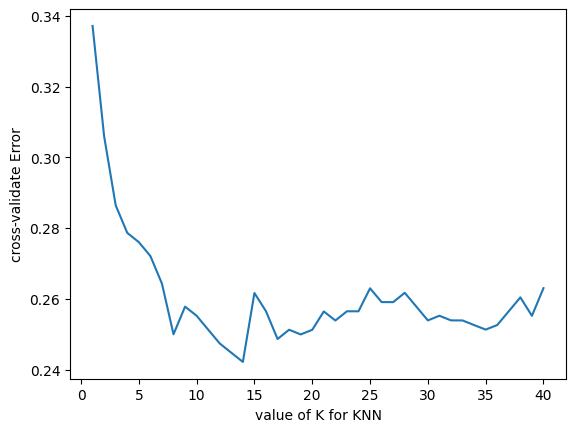

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range =range(1, 41)
k_scores= []
# use iteration to calculator different k in models, then return the average accuracy
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(knn,X,Y, cv=5)
    k_scores.append(1-scores.mean())
# plot to see clearly
plt.plot(k_range,k_scores)
plt.xlabel('value of K for KNN')
plt.ylabel('cross-validate Error')
plt.show()

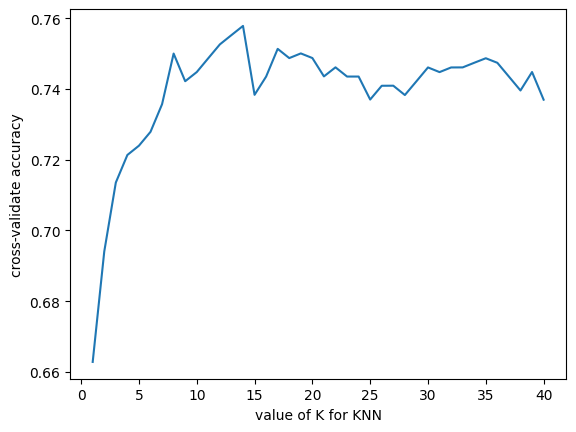

In [20]:
# or
# choose k between 1 to 41
k_range =range(1, 41)
k_scores= []
# use iteration to calculator different k in models, then return the average accuracy
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(knn,X,Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range,k_scores)
plt.xlabel('value of K for KNN')
plt.ylabel('cross-validate accuracy')
plt.show()

# SVM

In [21]:
# SVM classification
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [22]:
filename='pima-indians-diabetes.data.csv'
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
dataframe=read_csv(filename,names=names)
array=dataframe.values
X=array[:,0:8]
Y=array[:,8]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.3,random_state=7)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

# Grid Search CV

In [25]:
clf= SVC()
param_grid=[{'kernel':['rbf','ploy'],'gamma':[0.5,0.1,0.01],
            'C':[10,0.1,0.001,0.0001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.01],
                          'kernel': ['rbf', 'ploy']}])

In [26]:
gsv.best_params_,gsv.best_score_

({'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}, 0.6573724668064289)

In [27]:
#clf=SVC(kernel='poly',C=15, gamma=100)
clf = SVC(kernel='poly',C=15)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
print("Accuracy=",acc)

Accuracy= 76.19047619047619


In [28]:
y_pred

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1.

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83       147
         1.0       0.76      0.50      0.60        84

    accuracy                           0.76       231
   macro avg       0.76      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



In [ ]:
#pip install --upgrade scikit-learn

In [ ]:
#pip install --upgrade pip

# Plot different SVM classifier in the iris dataset

In [36]:
import sklearn
sklearn.__version__

'1.2.1'

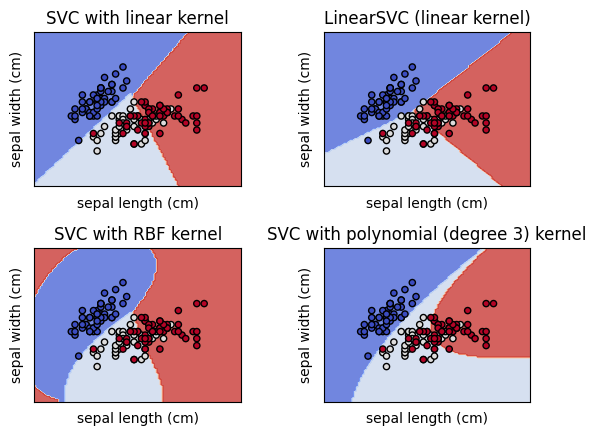

In [37]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Ridge Regression

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [19]:
boston_dataset=datasets.load_boston()
print(boston_dataset.DESCR)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [14]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(r"C:\Users\Dell\Downloads\housing.csv", header=None, delimiter=r"\s+", names=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
pip install -U jupyter


     ---------------------------------------- 0.0/121.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/121.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/121.0 kB ? eta -:--:--
     ------------- -------------------------- 41.0/121.0 kB ? eta -:--:--
     ----------------------------------- -- 112.6/121.0 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 121.0/121.0 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/137.8 kB ? eta -:--:--
     ------------------------------------ - 133.1/137.8 kB 8.2 MB/s eta 0:00:01
     -------------------------------------- 137.8/137.8 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     --- ------------------------------------ 0.2/2.0 MB 5.8 MB/s eta 0:00:01
     ------- -------------------------------- 0.4/2.0 MB 4.1 MB/s eta 0:00:01
     ------------ --------------------------- 0.6/2.0 MB 4.4 MB/s eta 0:00:01
     ---

In [22]:
pip list -o

Package                  Version Latest   TypeNote: you may need to restart the kernel to use updated packages.

------------------------ ------- -------- -----
beautifulsoup4           4.11.1  4.11.2   wheel
bleach                   5.0.1   6.0.0    wheel
contourpy                1.0.6   1.0.7    wheel
debugpy                  1.6.4   1.6.6    wheel
ipykernel                6.19.4  6.20.2   wheel
ipython                  8.8.0   8.9.0    wheel
jupyter_client           7.4.8   8.0.2    wheel
jupyter_core             5.1.2   5.2.0    wheel
jupyter-events           0.5.0   0.6.3    wheel
jupyter_server           2.0.6   2.2.0    wheel
jupyter_server_terminals 0.4.3   0.4.4    wheel
MarkupSafe               2.1.1   2.1.2    wheel
matplotlib               3.6.2   3.6.3    wheel
nbclassic                0.4.8   0.5.1    wheel
nbconvert                7.2.7   7.2.9    wheel
nbformat                 5.7.1   5.7.3    wheel
packaging                22.0    23.0     wheel
pandas                 